In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Data work
data = pd.read_csv("retail_data.csv")

data.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

data['CustomerID'] = data['CustomerID'].astype(np.int64)

lst = []
for i in data["Product"]:
    lst.append(1)

data.loc[:,'Action'] = lst

data = data[['CustomerID', 'Product', 'Action']]
data

/Users/viktortitarenko/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3043: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = yield from self.run_ast_nodes(code_ast.body, cell_name,


,CustomerID,Product,Action
0,14562,Small glass heart trinket pot,1
1,16370,Lunch bag suki design,1
2,17700,Wooden school colouring set,1
3,17841,Retro spot giant tube matches,1
4,15203,Set/3 russian doll stacking tins,1
...,...,...,...
1067364,16550,Regency cakestand 3 tier,1
1067366,13595,Retro spot ceramic toastrack,1
1067367,12633,Pack of 12 red spotty tissues,1
1067368,17539,Easter decoration sitting bunny,1


In [3]:
#Data to matrix
customer_product_matrix = data.pivot_table(index='CustomerID', columns='Product', values='Action').fillna(0)
customer_product_matrix

Product,doormat union jack guns and roses,3 stripey mice feltcraft,4 purple flock dinner candles,50's christmas gift bag large,animal stickers,bank charges,black pirate treasure chest,brown pirate treasure chest,camphor wood portobello mushroom,cherry blossom decorative flask,...,Zinc star t-light holder,Zinc sweetheart soap dish,Zinc sweetheart wire letter rack,Zinc t-light holder star large,Zinc t-light holder stars large,Zinc t-light holder stars small,Zinc top 2 door wooden shelf,Zinc willie winkie candle stick,Zinc wire kitchen organiser,Zinc wire sweetheart letter tray
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X=customer_product_matrix.T

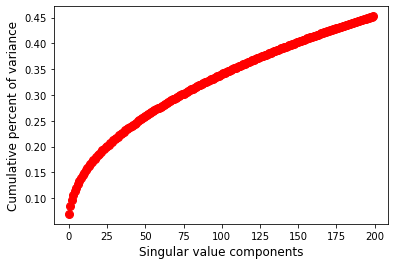

In [5]:
#SVD Model

SVD = TruncatedSVD(n_components=200, random_state=22)
matrix = SVD.fit_transform(X)



explained = SVD.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [6]:
#Correlation matrix
corr = np.corrcoef(matrix)
corr.shape

(5299, 5299)

In [7]:
title = customer_product_matrix.columns


In [20]:
#Enter id to get recommendation

idx = 3





print("You entered :", list(title)[idx])
print("\n")
print("Recommendations:\n")
corr_of_elem = corr[idx]

for i in list(title[(corr_of_elem<1.0) & (corr_of_elem > 0.5)]):
    elem = list(title).index(i)

    print('{0}:  --->  {1}'.format(i, corr_of_elem[elem]))


You entered :  50's christmas gift bag large


Recommendations:

 red spot gift bag large:  --->  0.6365699332094115
50's christmas paper gift bag:  --->  0.894216773510301
6 gift tags 50's christmas :  --->  0.6847302674914694
6 gift tags vintage christmas :  --->  0.5878524724979697
Box of 6 mini 50's crackers:  --->  0.5401008996357604
Red spot paper gift bag:  --->  0.6605824569424286
Roll wrap 50's christmas:  --->  0.6059765746198035
Roll wrap 50's red christmas :  --->  0.5435164650405832
Roll wrap vintage christmas:  --->  0.5220496582075417
Vintage christmas gift bag large :  --->  0.6993752709122295
Vintage christmas paper gift bag:  --->  0.6850232997743393
Wrap 50's  christmas:  --->  0.6457220323504815
